## Baseline code for the Forecast on Market Data

In [13]:
# import necessary libraries

import numpy as np 
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from metrics import measure_performance
import matplotlib.pyplot as plt

### Load the data

In [3]:
x_train = pd.read_csv('data/x_train.csv', index_col='timestamp')
x_test = pd.read_csv('data/x_test.csv', index_col='timestamp')
y_train = pd.read_csv('data/y_train.csv', index_col='timestamp')
y_test = pd.read_csv('data/y_test.csv', index_col='timestamp')

whole_data = pd.read_csv('data/whole_data.csv', index_col='timestamp')

In [4]:
whole_data

,symbol,close,x1,x2,x3,x4,x5,x6,x7,x8,x9,y1,y2,y3
timestamp,,,,,,,,,,,,,,
1720782000000,BTCUSDT,57188.8,1.000954,1.000704,0.999855,0.998924,-0.264794,0.172140,0.814119,0.950355,-0.001926,0.015632,0.006597,0.012523
1720785600000,BTCUSDT,57354.1,1.002561,1.002941,1.002401,1.001638,0.133313,0.410012,1.063420,1.047122,-0.001957,0.013582,0.007038,0.007613
1720789200000,BTCUSDT,57816.2,1.007068,1.009000,1.009156,1.008776,0.686941,0.486802,1.047105,0.975720,-0.002476,0.007839,0.000930,-0.001057
1720792800000,BTCUSDT,57799.9,1.004512,1.007119,1.007754,1.007676,1.336274,0.572887,1.025864,1.015855,-0.003001,-0.004401,0.000239,0.004261
1720796400000,BTCUSDT,58188.9,1.007487,1.011342,1.012696,1.013063,0.421036,0.584342,1.044123,1.048774,-0.003834,-0.011764,-0.005639,-0.003072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738634400000,BTCUSDT,100811.4,0.997863,1.003670,1.010514,1.015533,-0.355241,-0.540296,0.935159,0.970050,0.000509,-0.024159,-0.014844,-0.016680
1738638000000,BTCUSDT,100597.1,0.997157,1.001257,1.007312,1.012085,-0.283947,-0.616398,0.918955,0.863609,0.001557,-0.023659,-0.016331,-0.012229
1738641600000,BTCUSDT,100008.5,0.994198,0.996232,1.001241,1.005573,-0.123984,-0.496313,0.637781,0.775180,0.001840,-0.017153,-0.000656,-0.012038


In [5]:
x_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9
timestamp,,,,,,,,,
1720782000000,1.000954,1.000704,0.999855,0.998924,-0.264794,0.172140,0.814119,0.950355,-0.001926
1720785600000,1.002561,1.002941,1.002401,1.001638,0.133313,0.410012,1.063420,1.047122,-0.001957
1720789200000,1.007068,1.009000,1.009156,1.008776,0.686941,0.486802,1.047105,0.975720,-0.002476
1720792800000,1.004512,1.007119,1.007754,1.007676,1.336274,0.572887,1.025864,1.015855,-0.003001
1720796400000,1.007487,1.011342,1.012696,1.013063,0.421036,0.584342,1.044123,1.048774,-0.003834
...,...,...,...,...,...,...,...,...,...
1734951600000,1.000595,1.002494,1.002878,1.002459,-0.005317,-0.405472,1.029765,1.084854,0.004341
1734955200000,1.002889,1.005105,1.005797,1.005616,-0.078293,-0.351736,0.972015,1.038041,0.003937
1734958800000,0.992335,0.992403,0.992478,0.992062,0.332280,0.031294,0.837540,0.929536,0.004554


### Preprocess Data

In [6]:
# add lags to the input data
x_train = x_train.shift(1)
x_test = x_test.shift(1)

In [7]:
# List of columns to be lagged
columns_to_lag = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']

# Function to create lagged columns
def create_lagged_columns(df, columns, lag=1):
    for column in columns:
        df[column] = df[column].shift(lag)
    return df

# Create lagged columns
whole_data = create_lagged_columns(whole_data, columns_to_lag, lag=1)

In [8]:
x_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9
timestamp,,,,,,,,,
1720782000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1720785600000,1.000954,1.000704,0.999855,0.998924,-0.264794,0.172140,0.814119,0.950355,-0.001926
1720789200000,1.002561,1.002941,1.002401,1.001638,0.133313,0.410012,1.063420,1.047122,-0.001957
1720792800000,1.007068,1.009000,1.009156,1.008776,0.686941,0.486802,1.047105,0.975720,-0.002476
1720796400000,1.004512,1.007119,1.007754,1.007676,1.336274,0.572887,1.025864,1.015855,-0.003001
...,...,...,...,...,...,...,...,...,...
1734951600000,1.005522,1.007689,1.007930,1.007355,-0.142929,-0.421292,1.095072,1.048459,0.004522
1734955200000,1.000595,1.002494,1.002878,1.002459,-0.005317,-0.405472,1.029765,1.084854,0.004341
1734958800000,1.002889,1.005105,1.005797,1.005616,-0.078293,-0.351736,0.972015,1.038041,0.003937


In [9]:
whole_data

,symbol,close,x1,x2,x3,x4,x5,x6,x7,x8,x9,y1,y2,y3
timestamp,,,,,,,,,,,,,,
1720782000000,BTCUSDT,57188.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015632,0.006597,0.012523
1720785600000,BTCUSDT,57354.1,1.000954,1.000704,0.999855,0.998924,-0.264794,0.172140,0.814119,0.950355,-0.001926,0.013582,0.007038,0.007613
1720789200000,BTCUSDT,57816.2,1.002561,1.002941,1.002401,1.001638,0.133313,0.410012,1.063420,1.047122,-0.001957,0.007839,0.000930,-0.001057
1720792800000,BTCUSDT,57799.9,1.007068,1.009000,1.009156,1.008776,0.686941,0.486802,1.047105,0.975720,-0.002476,-0.004401,0.000239,0.004261
1720796400000,BTCUSDT,58188.9,1.004512,1.007119,1.007754,1.007676,1.336274,0.572887,1.025864,1.015855,-0.003001,-0.011764,-0.005639,-0.003072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738634400000,BTCUSDT,100811.4,1.002029,1.009761,1.017344,1.022534,-0.525206,-0.472364,0.917063,1.029615,-0.001951,-0.024159,-0.014844,-0.016680
1738638000000,BTCUSDT,100597.1,0.997863,1.003670,1.010514,1.015533,-0.355241,-0.540296,0.935159,0.970050,0.000509,-0.023659,-0.016331,-0.012229
1738641600000,BTCUSDT,100008.5,0.997157,1.001257,1.007312,1.012085,-0.283947,-0.616398,0.918955,0.863609,0.001557,-0.017153,-0.000656,-0.012038


### Build and Validate Model

Building model for target: y3
Performance metrics for target y3:
  MSE: 0.0005
  R2: -0.2304
  Directional_Accuracy: 0.4733


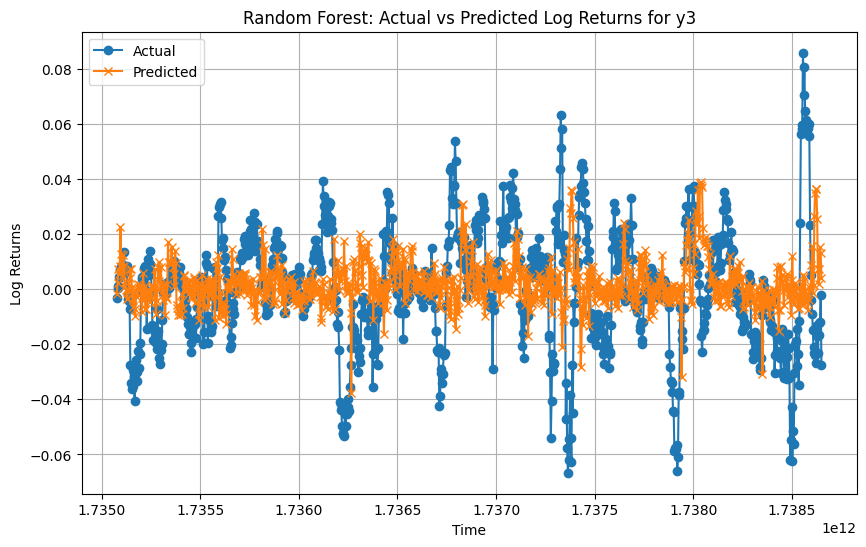

Directional Accuracy: 0.4733
Confusion Matrix:
[[190 285]
 [238 280]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.44      0.40      0.42       475
    Positive       0.50      0.54      0.52       518

    accuracy                           0.47       993
   macro avg       0.47      0.47      0.47       993
weighted avg       0.47      0.47      0.47       993



In [12]:
def build_model(x_train, y_train, target):
    """
    Build and return a Random Forest regression model for the specified target.
    
    Parameters:
        x_train (pd.DataFrame): Training features.
        y_train (pd.DataFrame): Training targets with multiple columns (e.g., y1, y2, y3).
        target (str): The target column to use (e.g., 'y1', 'y2', 'y3').
    
    Returns:
        model: A trained RandomForestRegressor model.
    """
    print(f"Building model for target: {target}")
    # Initialize with 500 trees and a fixed random_state for reproducibility.
    model = RandomForestRegressor(n_estimators=500, random_state=42)
    model.fit(x_train, y_train[target])
    return model

def validate_model(model, x_test):
    """
    Validate the trained model on the test data.
    
    Parameters:
        model: Trained regression model.
        x_test (pd.DataFrame): Test features.
        
    Returns:
        y_pred (np.array): Model predictions.
    """
    y_pred = model.predict(x_test)
    return y_pred

def plot_predictions(y_test, y_pred, target, title=None):
    """
    Plot actual vs. predicted values for the specified target.
    
    Parameters:
        y_test (pd.DataFrame): Test targets (multiple columns expected).
        y_pred (np.array): Predictions from the model.
        target (str): The target column to plot.
        title (str): Plot title (optional).
    """
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test[target], label='Actual', marker='o')
    plt.plot(y_test.index, y_pred, label='Predicted', marker='x')
    plt.xlabel("Time")
    plt.ylabel("Log Returns")
    if title is None:
        title = f"Random Forest: Actual vs Predicted Log Returns for {target}"
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def compute_directional_metrics(y_test, y_pred, target):
    """
    Compute directional predictions, accuracy, confusion matrix, and classification report.
    
    Parameters:
        y_test (pd.DataFrame): Test targets.
        y_pred (np.array): Predictions from the model.
        target (str): The target column for evaluation.
        
    Returns:
        directional_accuracy (float): Proportion of correct directional predictions.
        conf_mat (np.array): Confusion matrix.
        class_report (str): Classification report.
    """
    # Convert continuous values to direction (-1 or +1)
    y_test_direction = np.where(y_test[target] >= 0, 1, -1)
    y_pred_direction = np.where(y_pred >= 0, 1, -1)
    directional_accuracy = np.mean(y_test_direction == y_pred_direction)
    
    conf_mat = confusion_matrix(y_test_direction, y_pred_direction)
    class_report = classification_report(y_test_direction, y_pred_direction, target_names=["Negative", "Positive"])
    
    return directional_accuracy, conf_mat, class_report

# =============================================================================
# Example Usage
# =============================================================================
if __name__ == '__main__':
    # Specify the target column to work with (e.g., 'y3')
    target = 'y3'
    
    # 1. Build the model using the specified target.
    model = build_model(x_train, y_train, target)
    
    # 2. Validate the model on the test set.
    y_pred = validate_model(model, x_test)
    
    # 3. Evaluate the model using regression and directional metrics.
    performance = measure_performance(y_test[target], y_pred)
    print(f"Performance metrics for target {target}:")
    for metric, value in performance.items():
        print(f"  {metric}: {value:.4f}")
    
    # 4. Plot the true vs. predicted values.
    plot_predictions(y_test, y_pred, target)
    
    # 5. Compute and display directional metrics.
    directional_accuracy, conf_mat, class_report = compute_directional_metrics(y_test, y_pred, target)
    print(f"Directional Accuracy: {directional_accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_mat)
    print("\nClassification Report:")
    print(class_report)


In [1]:
# build a simple backtester with holding period 